C:\Users\tsuchida\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


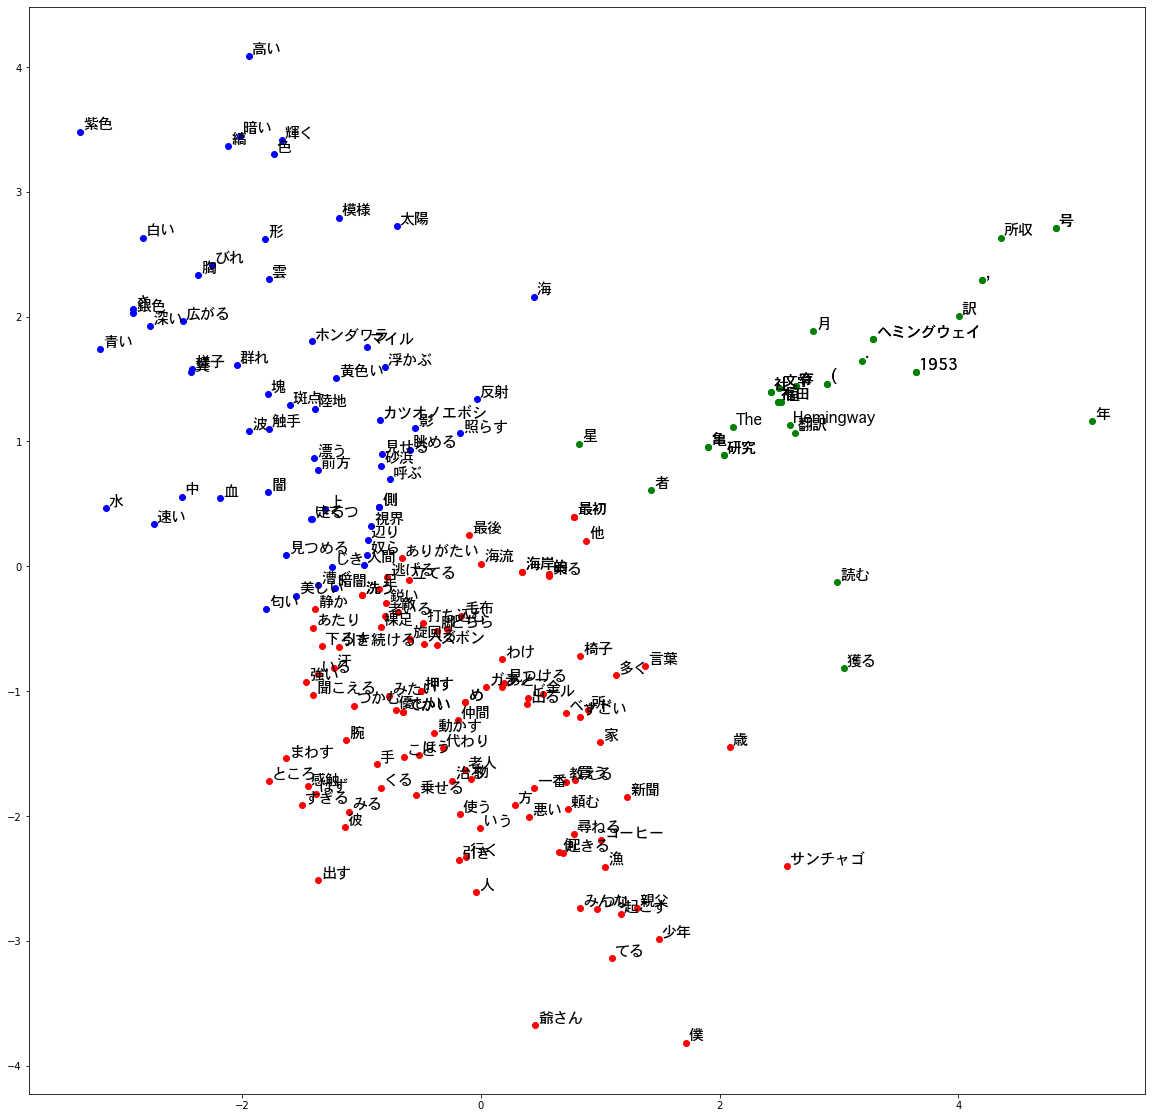

In [16]:
#AI-TECHGYM-1-12-A-4
#自然言語処理

#インポート
from gensim.models import word2vec
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

#pandas
import pandas as pd

#PCA
from sklearn.decomposition import PCA

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

#フォントの準備
#import urllib.request as req
#url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
#req.urlretrieve(url, "./Osaka.ttc")

#フォントの指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#モデルの読み込み
model_path = './words.model'
model = word2vec.Word2Vec.load(model_path)

def draw_2d_2groups_k(vectors, target1, target2, topn=100):
    similars1 = [w[0] for w in vectors.wv.most_similar(target1, topn=topn)]
    similars1.insert(0, target1)
    similars2 = [w[0] for w in vectors.wv.most_similar(target2, topn=topn)]
    similars2.insert(0, target2)
    similars = similars1 + similars2
    colors = ['b']+['g']*(topn)+ ['r']+['orangered']*(topn)
    X = [vectors.wv[w] for w in similars]
    pca = PCA(n_components=2)
    Y = pca.fit_transform(X)
    
    # クラスター分析
    kmeans = KMeans(init='random', n_clusters=3)
    kmeans.fit(Y)
    z_pred = kmeans.predict(Y)
    
    # 順にx座標、y座標、cluster番号のデータを横に結合するためconcatでaxis=1を指定
    merge_data = pd.concat([pd.DataFrame(Y[:,0]), pd.DataFrame(Y[:,1]), pd.DataFrame(z_pred)], axis=1)
    merge_data.columns = ['X','Y','cluster']
    
    #グラフサイズ
    plt.figure(figsize=(20,20))
    
    #display(cluster_df)
    df0 = merge_data[merge_data.cluster == 0]
    df1 = merge_data[merge_data.cluster == 1]
    df2 = merge_data[merge_data.cluster == 2]

    #グラフのプロット
    plt.scatter(df0['X'],df0['Y'],color='blue',label='cluster0')
    plt.scatter(df1['X'],df1['Y'],color='red',label='cluster1')
    plt.scatter(df2['X'],df2['Y'],color='green',label='cluster2')
    
    for w, x, y in zip(similars[:], Y[:, 0], Y[:,1]):
        plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=15)
    plt.show()

#単語を指定
word1="海"
word2="老人"

#グラフ描画
draw_2d_2groups_k(model,word1,word2,topn=100)


In [7]:
vectors_2D

array([[-1.62405359, -1.99041941],
       [ 3.19844535,  1.4712148 ],
       [ 3.53563108, -1.4531919 ],
       [-2.02366973,  3.09340928],
       [-3.08635312, -1.12101277]])

In [ ]:
for w, c in zip(words, colors):
    print(w, c)

In [2]:
names = ['Alice', 'Bob', 'Charlie']
ages = [24, 50, 18]

for name, age in zip(names, ages):
    print(name, age)
# Alice 24
# Bob 50
# Charlie 18

Alice 24
Bob 50
Charlie 18


In [ ]:
display(set(trans[trans.StockCode=='85123A'].Description))

In [ ]:
display(set(trans[trans.StockCode=='47566'].Description))

In [ ]:
display(trans[trans.StockCode=='85123A'].Description.value_counts())

In [ ]:
display(trans.head())

In [ ]:
import numpy as np

df_view = pd.DataFrame(pd.date_range('2000-01-02', freq='1D', periods=15), columns=['Date'])

bins_dt = pd.date_range('2000-01-01', freq='3D', periods=6)
bins_str = bins_dt.astype(str).values

labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

df['cat'] = pd.cut(df.Date.astype(np.int64)//10**9, bins=bins_dt.astype(np.int64)//10**9, labels=labels)

In [ ]:
df_view = pd.concat([trans[trans.StockCode=='85123A'], trans[trans.StockCode=='47566']], axis=0)
display(df_view.head(1))

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
df_view = df_view.set_index('InvoiceDate')
df_view.plot.bar()